# Simulations and Statistical Inference

In [1]:
library(tidyverse)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1     ✔ purrr   0.3.2
✔ tibble  2.1.2     ✔ dplyr   0.8.1
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
options(repr.plot.width=4, repr.plot.height=3)

## Set random number seed for reproducibility

In [3]:
set.seed(42)

## Generating numbers

Using the `c` function

In [4]:
c(1,2,3,5,8,13)

[1]  1  2  3  5  8 13

Using the `:` operator

In [5]:
1:10

[1]  1  2  3  4  5  6  7  8  9 10

In [6]:
10:1

[1] 10  9  8  7  6  5  4  3  2  1

Using the `seq` function

In [7]:
seq(1, 10)

[1]  1  2  3  4  5  6  7  8  9 10

In [8]:
seq(1, 10, 2)

[1] 1 3 5 7 9

In [9]:
seq(10, 1, -1)

[1] 10  9  8  7  6  5  4  3  2  1

In [10]:
seq(0, 1, length.out = 11)

[1] 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0

## Using `rep`

`rep` is useful for generating repeating data patterns.

In [11]:
rep(3, 5)

[1] 3 3 3 3 3

In [12]:
rep(1:3, times=5)

[1] 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3

In [13]:
rep(1:3, each=5)

[1] 1 1 1 1 1 2 2 2 2 2 3 3 3 3 3

In [14]:
rep(1:3, length.out=10)

[1] 1 2 3 1 2 3 1 2 3 1

## Using `sample`

Simulate `n` tooses of a coin

In [15]:
n <- 10

In [16]:
t1 <- sample(c('H', 'T'), n, replace = TRUE)
t1

[1] "H" "H" "H" "H" "T" "T" "T" "T" "H" "T"

In [17]:
table(t1)

t1
H T 
5 5 

Simulate `n` tosses of a biased coin

In [18]:
t2 <- sample(c('H', 'T'), n, replace = TRUE, prob = c(0.3, 0.7))
t2

[1] "T" "H" "H" "T" "T" "H" "H" "T" "T" "T"

In [19]:
table(t2)

t2
H T 
4 6 

Simulate `n` rolls of a 6-sided die

In [20]:
n <- 100

In [21]:
d1 <- sample(1:6, n, replace=TRUE)
d1

[1] 3 1 1 3 4 5 5 5 4 2 4 3 2 1 2 6 3 6 2 4 4 6 2 5 4 5 4 2 2 3 1 5 2 2 6 6 2
 [38] 4 3 6 5 2 6 2 2 5 1 1 4 5 2 1 5 4 4 1 3 3 5 5 4 6 5 4 6 2 2 1 2 5 6 5 4 1
 [75] 4 2 2 3 5 5 6 3 6 4 5 1 4 1 1 5 6 3 1 2 5 6 1 5 6 5

In [22]:
table(d1)

d1
 1  2  3  4  5  6 
15 20 11 17 22 15 

Sampling without replacement. For example, if we wanted to assiggn 16 samples to treatment A or B at random such that exactly half had each treatment.

In [23]:
sample(rep(c('A', 'B'), each=8))

[1] "B" "A" "B" "B" "B" "B" "A" "A" "A" "B" "A" "B" "B" "A" "A" "A"

## Random number generators

### Discrete distributions

Sampling from a Bernoullli distribution returns TRUE for success and FALSE for failure.

In [24]:
rbernoulli(n=10, p=0.5)

[1]  TRUE  TRUE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE  TRUE

In [25]:
as.integer(rbernoulli(n=10, p=0.5))

[1] 0 0 0 0 0 1 1 1 1 1

Sampling from a Binomial distribution returns the number of **successes** in `size` trials for `n` experiments.

In [26]:
rbinom(n=10, p=0.5, size=5)

[1] 4 2 2 3 3 4 3 1 2 2

Sampling from a negative binomial distribution returns the number of **failures** until `size` succcesses are observed for `n` experiemnts.

In [27]:
rnbinom(n=10, size=5, prob=0.5)

[1] 4 0 9 4 2 4 6 5 5 4

Sampling from a Poisson distribution returns the number of **successes** in `n` experiments if the average success rate per experiment is `lambda`.

In [28]:
rpois(n=10, lambda = 3)

[1] 5 2 1 0 2 2 1 2 0 9

**Note**:  We can give different parameters for each experiment in these distributions.

In [29]:
rpois(n=10, lambda=1:10)

[1]  2  0  5  4  4  3  7  4  7 10

### Continuous distributions

Sampling from a standard uniform distribution.

In [30]:
runif(5)

[1] 0.1594699 0.1495790 0.4992729 0.9405649 0.3342313

Sampling form a uniform distribution, with values between 90 and 100.

In [31]:
runif(5, 90, 100)

[1] 91.88434 92.69716 95.30744 90.21450 97.98760

Sampling from a standard normal distribution.

In [32]:
rnorm(5)

[1] -1.224748e+00  1.795164e-01  5.676206e-01 -4.928774e-01  6.288407e-05

## Looping

In [33]:
for (i in 1:10) {
    print(mean(rnorm(10)))
}

[1] 0.06091411
[1] -0.1028669
[1] -0.3117706
[1] 0.09639036
[1] 0.2010454
[1] -0.2384309
[1] 0.1271087
[1] -0.2115652
[1] -0.01946474
[1] -0.04661421


Saving variables generated in a loop

In [34]:
n <- 10
vars <- numeric(n)
for (i in 1:n) {
    vars[i] <- mean(rnorm(10))
}
vars

[1]  0.10286969  0.03949636  0.05872414 -0.20803960  0.17508896 -0.02249840
 [7]  0.15736520 -0.11380999 -0.15170191  0.08060583

In [35]:
lapply(1:10,FUN = rnorm)

[[1]]
[1] 0.1527641

[[2]]
[1]  0.98859685 -0.07345833

[[3]]
[1] -1.3870266 -1.3066759 -0.7683953

[[4]]
[1] -0.52710813 -0.02142707  0.67049807 -0.43461704

[[5]]
[1] -1.113880  0.607106  0.275457  1.157347 -1.682481

[[6]]
[1]  0.08731909  1.35336189  0.72417380 -0.83255283  0.73252849 -0.87192687

[[7]]
[1] -0.4533975  1.1875343 -0.2901453  0.8285461 -0.2912277 -1.5763624 -0.8488157

[[8]]
[1] -1.0885199 -0.4842906 -0.3363112 -0.1533579 -0.2432472  1.8922020 -1.3859983
[8] -0.4148243

[[9]]
[1]  0.3490815  1.6284423  0.0885219  1.2391507 -1.6445555  1.4463565 -0.6905602
[8] -0.2764311 -1.1094188

[[10]]
 [1]  0.1338693  1.7853391  2.4221634 -1.0768289  0.4859411  1.3885217
 [7] -0.1956568 -0.2181748 -0.3047780  0.5978327

In [36]:
lapply(1:10, FUN = function(x) mean(rnorm(x)))

[[1]]
[1] 1.397429

[[2]]
[1] 0.5039039

[[3]]
[1] -0.1176861

[[4]]
[1] 0.3750716

[[5]]
[1] 0.2393106

[[6]]
[1] 0.1003157

[[7]]
[1] -0.9766621

[[8]]
[1] -0.2799746

[[9]]
[1] 0.2033815

[[10]]
[1] 0.0364463

## Using `replicate`

`replicate` is like `rep` but works for a function (such as a random number generator)

In [37]:
replicate(3, rnorm(5))

-0.8673179,-0.2785431,-0.4034675
0.9506517,0.5461152,0.1046594
-0.5850115,-1.3038212,-0.3188808
0.3209575,-0.2509145,1.6183439
-0.2993960,0.1710074,0.7141886


`replicate` is quite useful for simulations. For example, suppose we want to know the distribution of the sample mean  if we sampled 100 numbers from the standard normal distribution 1,000 times.

In [38]:
n_expts <- 1000
n <- 100

### Using for loop

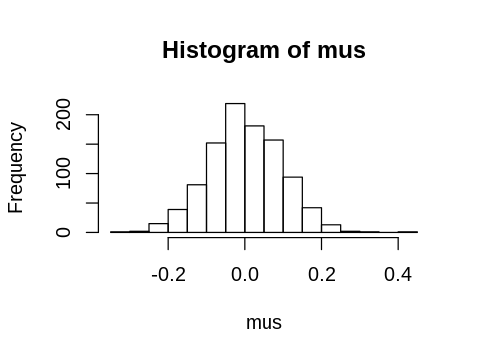

In [39]:
set.seed(123)
mus <- numeric(n_expts)
for (i in 1:n_expts) {
    mus[i] <- mean(rnorm(n))
}
hist(mus)

### Using replicate

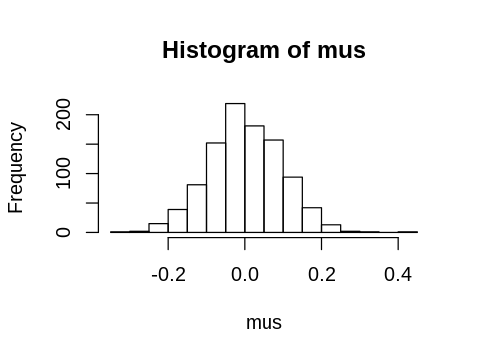

In [40]:
set.seed(123)
mus <- replicate(n_expts, mean(rnorm(n)))
hist(mus)

## Making a `data.frame`  or `tibble` of simulated data

Let's simulate the following experiment. 

- There are 10 subjects in Group A and 10 subjects in Group B with random PIDs from 10000-99999
- We measure 5 genes in each subject. The genes have the same distribution for each subject, but different genes have different distribtutions:
    - gene1 $\sim N(10, 1)$
    - gene2 $\sim N(11, 2)$
    - gene3 $\sim N(12, 3)$
    - gene4 $\sim N(13, 4)$
    - gene5 $\sim (N(14, 5)$
    
NB: This is for illustration purposes! Our gene counts (even if 'normalized') are not normally distributed!

In [41]:
replicate(5, rnorm(3, 1:5, 1))

1.264993,0.9467906,1.076689,-1.503406,1.069951
3.830747,2.4379042,2.455073,1.404136,3.169101
2.940622,4.3374490,3.873871,2.264472,1.632268


In [42]:
n <- 10
n_genes <- 5
min_pid <- 10000
max_pid <- 99999
groupings <- c('A', 'B')
n_groups <- length(groupings)
gene_mus <- 10:14
gene_sigmas <- 1:5
pad_width <- 3

In [43]:
pids <- sample(min_pid:max_pid, n_groups*n)
groups <- sample(rep(groupings, each=n))
genes <- t(replicate(n_groups*n, rnorm(n_genes, gene_mus, gene_sigmas)))
gene_names <- paste('gene', str_pad(1:n_genes, width = pad_width, pad='0'), sep='')
colnames(genes) <- gene_names

In [44]:
df <- tibble(
    pid = pids,
    grp = groups,
    genes
)

In [45]:
sample_n(df, 3)

pid,grp,genes
<int>,<chr>,"<dbl[,5]>"
97320,A,"9.532829, 11.047354, 14.08499, 14.35483, 22.422266"
50148,B,"10.046358, 11.926989, 14.43202, 14.20053, 14.613053"
86850,A,"9.535037, 9.418596, 13.01083, 13.11000, 9.554716"


### Breakdown of simulation

Set up simulation configration parameters.

In [46]:
n <- 10
n_genes <- 5
min_pid <- 10000
max_pid <- 99999
groupings <- c('A', 'B')
n_groups <- length(groupings)
gene_mus <- 10:14
gene_sigmas <- 1:5
pad_width <- 3

Create unique PIDs for each subject

In [47]:
pids <- sample(min_pid:max_pid, n_groups*n)

Assign a group to each subject at random

In [48]:
groups <- sample(rep(groupings, each=n))

Make up 5 genes from different distributions for each subject

In [49]:
genes <- t(replicate(n_groups*n, rnorm(n_genes, gene_mus, gene_sigmas)))

Make nice names for each gene

In [50]:
gene_names <- paste('gene', str_pad(1:n_genes, width = pad_width, pad='0'), sep='')

Assign names to gene columns

In [51]:
colnames(genes) <- gene_names

Create `tibble` to store simulated data

In [52]:
df <- tibble(
    pid = pids,
    grp = groups,
    genes
)

Peek into `tibble`

In [53]:
sample_n(df, 3)

pid,grp,genes
<int>,<chr>,"<dbl[,5]>"
48611,A,"11.118810, 10.281882, 9.460913, 21.654971, 12.769903"
82193,B,"9.250903, 12.410494, 10.502977, 8.569185, 15.181737"
66967,A,"11.680328, 9.572095, 13.354410, 9.423921, 6.070365"
